# Polynomial Regression with SciKit-Learn


## Imports modul

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from joblib import dump, load
from sklearn.pipeline import Pipeline

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Sample Data


In [4]:
df = pd.read_csv("..\Data/Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 9)

## Train | Test Split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)

In [11]:
model.fit(X_train,y_train)

LinearRegression()


-----

## Evaluation on the Test Set

In [12]:
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [13]:
print("MAE\t: ",MAE)
print("MSE\t: ",MSE)
print("RMSE\t: ",RMSE)

MAE	:  0.4896798044803559
MSE	:  0.44175055104034133
RMSE	:  0.6646431757269019


## Choosing a Model  elbow

In [14]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

trainmse=[]
testmse=[]

MAE=[]
MAE_test=[]

for d in range(1,15):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    
    trainsmse=mean_squared_error(y_train,train_pred)
    testsmse=mean_squared_error(y_test,test_pred)
    
    
    trainmse.append(trainsmse)
    testmse.append(testsmse)
    
    MAEtest=mean_absolute_error(y_test,test_predictions)
    MAEtrain=mean_absolute_error(y_train,train_pred)
    
    
    MAE_test.append(MAEtest)
    MAE.append(MAEtrain)

# **testmse**

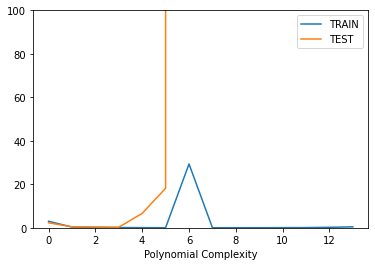

In [15]:
plt.plot(range(14),trainmse[:14],label='TRAIN')
plt.plot(range(14),testmse[:14],label='TEST')
plt.xlabel("Polynomial Complexity")

plt.ylim(0,100)
plt.legend()

# **test_rmse_errors**

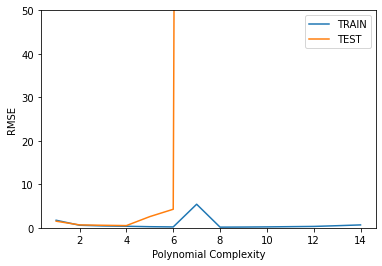

In [16]:
plt.plot(range(1,15),train_rmse_errors[:15],label='TRAIN')
plt.plot(range(1,15),test_rmse_errors[:15],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,50)
plt.legend()

# **MAE_test**

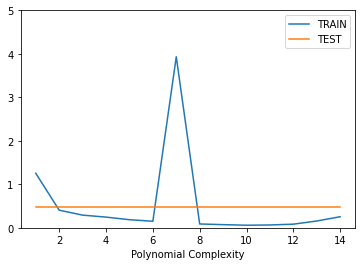

In [17]:
plt.plot(range(1,15),MAE[:15],label='TRAIN')
plt.plot(range(1,15),MAE_test[:15],label='TEST')
plt.xlabel("Polynomial Complexity")

plt.ylim(0,5)
plt.legend()

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape

(140, 3)

In [19]:
X_train.head()

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


# **degree 4**

In [20]:

final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X_train),y_train)


LinearRegression()

In [21]:
test_predictions =final_model.predict(final_poly_converter.transform(X_test))
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [22]:
print("MAE\t\t: ",MAE)
print("MSE\t\t: ",MSE)
print("RMSE\t\t: ",RMSE)
print("model.score\t: ",final_model.score(final_poly_converter.transform(X_test),y_test))

MAE		:  0.3926093765986013
MSE		:  0.2578347048485534
RMSE		:  0.5077742656422768
model.score	:  0.9908673417360676


# **degree 3**

In [23]:

final_poly_converter3 = PolynomialFeatures(degree=3,include_bias=False)
final_model3 = LinearRegression()
final_model3.fit(final_poly_converter3.fit_transform(X_train),y_train)


LinearRegression()

In [24]:
test_predictions3 =final_model3.predict(final_poly_converter3.transform(X_test))
MAE = mean_absolute_error(y_test,test_predictions3)
MSE = mean_squared_error(y_test,test_predictions3)
RMSE = np.sqrt(MSE)

In [25]:
print("MAE\t\t: ",MAE)
print("MSE\t\t: ",MSE)
print("RMSE\t\t: ",RMSE)
print("model.score\t: ",final_model3.score(final_poly_converter3.transform(X_test),y_test))

MAE		:  0.41275160854074744
MSE		:  0.3367813797590759
RMSE		:  0.5803286825231679
model.score	:  0.9880710036579371


# **plot y_pred and y_test**

In [28]:
df_1=pd.DataFrame(test_predictions)
df_2=pd.DataFrame(y_test)
df_2=df_2.reset_index(drop=True)
df_3=pd.concat([df_2,df_1],axis=1)
df_3=df_3.sort_values('sales')
x_line=np.arange(len(y_test))

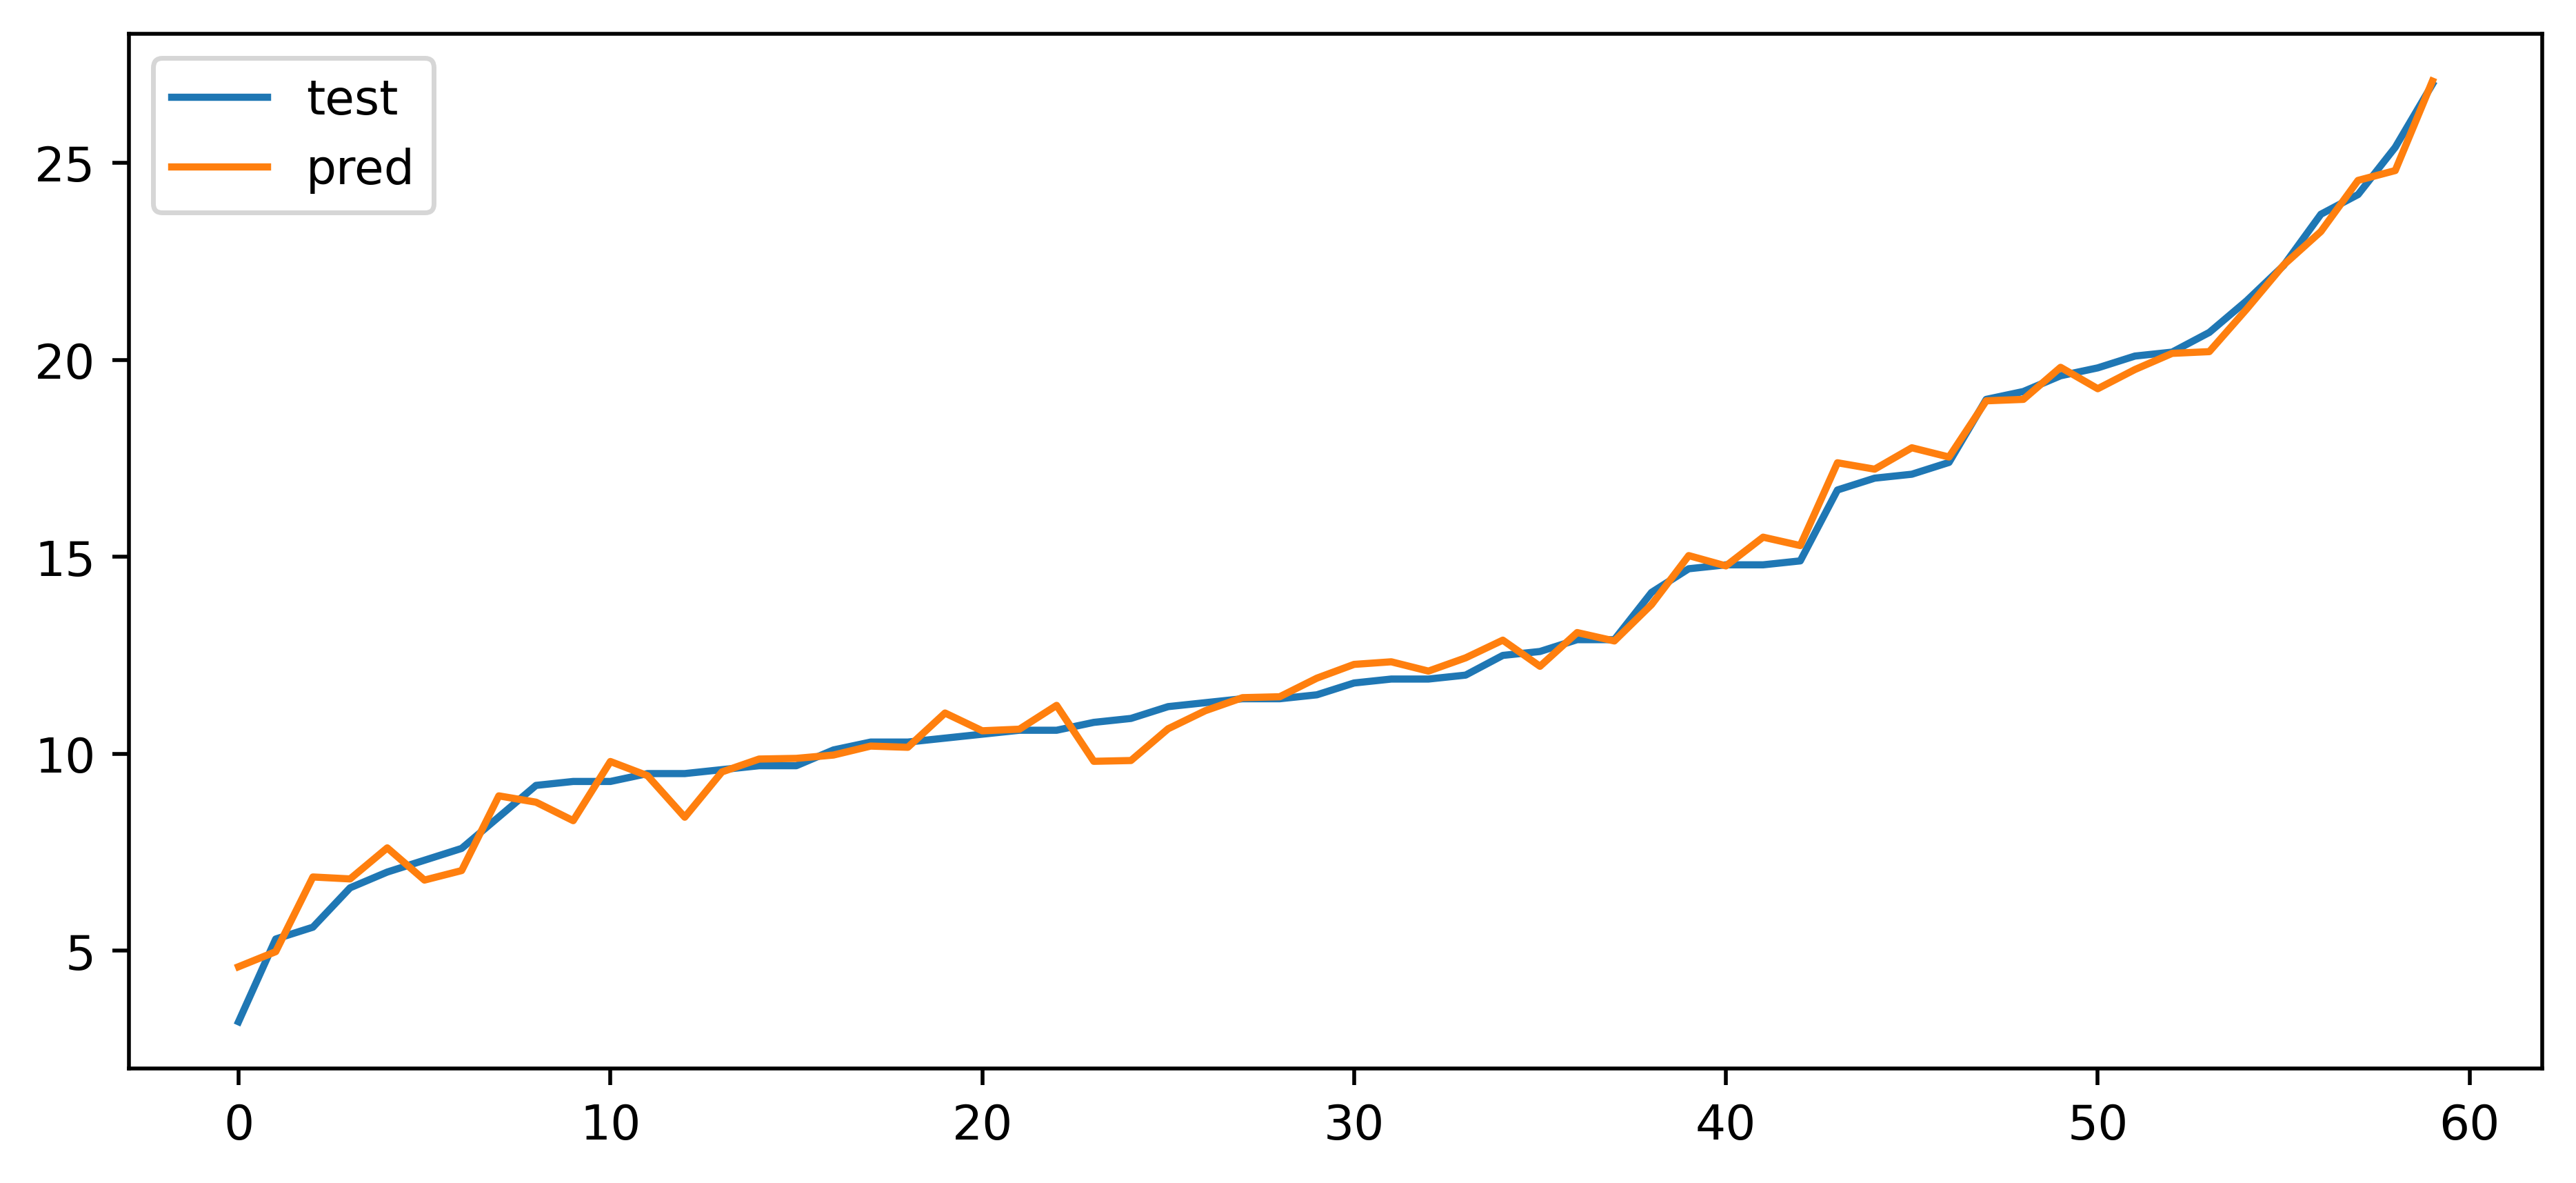

In [29]:


fig = plt.figure(figsize=(7,3),dpi=500)
axes = fig.add_axes([0, 0, 1, 1]) 

axes.plot(x_line,df_3['sales'].values,label='test')
axes.plot(x_line,df_3[0].values,label='pred')
plt.legend()
plt.show()

### Saving Model and Converter

In [83]:
dump(final_model, 'final_sales_poly_model.joblib') 

['final_sales_poly_model.joblib']

In [84]:
dump(final_poly_converter,'final_sales_poly_model.joblib')

['final_sales_poly_model.joblib']

In [167]:
final_poly_converter

PolynomialFeatures(degree=4, include_bias=False)

In [218]:
operations = [('final_poly_converter',final_poly_converter),('final_model',final_model)]
pipe = Pipeline(operations)

In [219]:
pipe

Pipeline(steps=[('final_poly_converter',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('final_model', LinearRegression())])

In [220]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [221]:
final_model.predict(final_poly_converter.transform([[230.1,37.8,69.2]]))

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([21.63568589])

In [222]:
pipe.predict([[230.1,37.8,69.2]])

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([21.63568589])

In [223]:
dump(final_model, 'final_sales_poly_model_pipe.joblib') 

['final_sales_poly_model_pipe.joblib']

-----
---